<a href="https://colab.research.google.com/github/oumaimaoubaha/Classification_des_Langues_Europ-en/blob/main/SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gzip
import json
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
file_path = "/content/Video_Games_5.json.gz"

data = []

print("📥 Lecture du fichier...")

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

print("✅ Fichier lu ! Nombre de lignes :", len(data))

df = pd.DataFrame(data)

# Aperçu
df.head()


📥 Lecture du fichier...
✅ Fichier lu ! Nombre de lignes : 497577


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


**Choix des colonnes utiles**

In [ ]:
df = df[['reviewerID', 'asin', 'overall', 'unixReviewTime']]
df.head()


,reviewerID,asin,overall,unixReviewTime
0,A1HP7NVNPFMA4N,0700026657,5.0,1445040000
1,A1JGAP0185YJI6,0700026657,4.0,1437955200
2,A1YJWEXHQBWK2B,0700026657,3.0,1424649600
3,A2204E1TH211HT,0700026657,2.0,1424390400
4,A2RF5B5H74JLPE,0700026657,5.0,1419465600


**Les vrais dates**

In [ ]:
import pandas as pd

# 1) Convertir le timestamp en vraie date
df['date'] = pd.to_datetime(df['unixReviewTime'], unit='s')

# 2) Extraire l'année
df['year'] = df['date'].dt.year

# 3) Extraire le mois (numéro 1..12)
df['month'] = df['date'].dt.month

# 4) Vérifier le résultat
df[['unixReviewTime', 'date', 'year', 'month']].head()


,unixReviewTime,date,year,month
0,1445040000,2015-10-17,2015,10
1,1437955200,2015-07-27,2015,7
2,1424649600,2015-02-23,2015,2
3,1424390400,2015-02-20,2015,2
4,1419465600,2014-12-25,2014,12


# Gérer les doublans

In [ ]:
df.duplicated().sum()


np.int64(23718)

**Analyse**

In [ ]:
df[df.duplicated()].head(10)


,reviewerID,asin,overall,unixReviewTime,date,year,month
969,A1CDNTB7377YH2,B00000DMAQ,5.0,1178150400,2007-05-03,2007,5
2409,AROWZGGO4VTJU,B00000INR2,1.0,1325635200,2012-01-04,2012,1
4804,A3L14D8BAREUSV,B00001NFS5,5.0,1162857600,2006-11-07,2006,11
6848,A2R164STV36F6C,B00002DHEV,4.0,1393804800,2014-03-03,2014,3
8316,A36UKFV79879MD,B00002STX3,4.0,1316044800,2011-09-15,2011,9
11365,AER15RIMV8E6D,B000035Y3N,5.0,1317513600,2011-10-02,2011,10
12849,A74TA8X5YQ7NE,B00004KHB7,5.0,1206316800,2008-03-24,2008,3
13113,A8TCAEBMUQ3VP,B00004R9I4,5.0,969840000,2000-09-25,2000,9
13172,A8TCAEBMUQ3VP,B00004R9I4,5.0,969840000,2000-09-25,2000,9
13173,A8TCAEBMUQ3VP,B00004R9I4,5.0,969840000,2000-09-25,2000,9


In [ ]:
df[df.duplicated(keep=False)].sort_values(by=['reviewerID', 'asin']).head(20)


,reviewerID,asin,overall,unixReviewTime,date,year,month
119730,A0059486XI1Z0P98KP35,B000WE8JES,5.0,1402099200,2014-06-07,2014,6
142958,A0059486XI1Z0P98KP35,B000WE8JES,5.0,1402099200,2014-06-07,2014,6
122102,A0220159ZRNBTRKLG08H,B000X37732,5.0,1428710400,2015-04-11,2015,4
145330,A0220159ZRNBTRKLG08H,B000X37732,5.0,1428710400,2015-04-11,2015,4
140450,A0685888WB02Q69S553P,B0017XFP8G,3.0,1416268800,2014-11-18,2014,11
163678,A0685888WB02Q69S553P,B0017XFP8G,3.0,1416268800,2014-11-18,2014,11
136443,A0695568PX4DBZOQDN8,B0016B28WU,5.0,1361318400,2013-02-20,2013,2
159671,A0695568PX4DBZOQDN8,B0016B28WU,5.0,1361318400,2013-02-20,2013,2
139943,A0815906MFVDTIFHGRQR,B0017KIBAI,5.0,1384819200,2013-11-19,2013,11
163171,A0815906MFVDTIFHGRQR,B0017KIBAI,5.0,1384819200,2013-11-19,2013,11


**Supprimer**

In [ ]:
df = df.drop_duplicates()
df.shape


(473859, 7)

# Gerer les valeur manquants

> Ajouter une citation



In [ ]:
df.isna().sum()


,0
reviewerID,0
asin,0
overall,0
unixReviewTime,0
date,0
year,0
month,0


In [ ]:
df[df['reviewerID'].isna()]
df[df['asin'].isna()]


,reviewerID,asin,overall,unixReviewTime,date,year,month


# Analyse

Analyse nombre d'avis par année

In [ ]:
# Nombre d'avis par année
year_counts = df['year'].value_counts().sort_index()
print(year_counts)


year
1999       81
2000     1855
2001     5117
2002     7344
2003     6983
2004     7235
2005     7763
2006     7031
2007    10284
2008    14973
2009    16573
2010    16036
2011    17623
2012    24457
2013    45601
2014    70980
2015    88822
2016    74659
2017    38785
2018    11657
Name: count, dtype: int64


statistiques globales

In [ ]:
print("Nombre total de lignes :", len(df))
print("Nombre d'utilisateurs uniques :", df['reviewerID'].nunique())
print("Nombre de jeux uniques :", df['asin'].nunique())




Nombre total de lignes : 473859
Nombre d'utilisateurs uniques : 55223
Nombre de jeux uniques : 17408


In [ ]:
user_counts = df['reviewerID'].value_counts()
print(user_counts.describe())


count    55223.000000
mean         8.580827
std         10.132530
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        780.000000
Name: count, dtype: float64


La distribution du nombre d’avis par utilisateur est très asymétrique : la majorité des utilisateurs sont peu actifs, tandis qu’une minorité très active contribue à une part importante des interactions.

In [ ]:
game_counts = df['asin'].value_counts()
print(game_counts.describe())


count    17408.000000
mean        27.220761
std         47.462580
min          1.000000
25%          7.000000
50%         12.000000
75%         27.000000
max        783.000000
Name: count, dtype: float64


La distribution du nombre d’avis par jeu présente une longue traîne : beaucoup de jeux sont peu populaires, tandis que quelques titres concentrent une énorme activité

In [ ]:
print("\nRésumé des notes :")
print(df['overall'].describe())


Résumé des notes :
count    473859.000000
mean          4.226289
std           1.182610
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64


La distribution des notes est fortement biaisée vers les valeurs élevées, ce qui reflète un biais de positivité classique dans les systèmes d’avis en ligne

Décision


In [ ]:
user_counts = df['reviewerID'].value_counts()
active_users = user_counts[user_counts >= 5].index

df = df[df['reviewerID'].isin(active_users)]
print("Après filtrage users :", df.shape)


Après filtrage users : (457558, 7)


In [ ]:
game_counts = df['asin'].value_counts()
active_games = game_counts[game_counts >= 5].index

df = df[df['asin'].isin(active_games)]
print("Après filtrage jeux :", df.shape)


Après filtrage jeux : (456080, 7)


In [ ]:
print("Final - nombre de lignes :", df.shape[0])
print("Final - utilisateurs uniques :", df['reviewerID'].nunique())
print("Final - jeux uniques :", df['asin'].nunique())


Final - nombre de lignes : 456080
Final - utilisateurs uniques : 50997
Final - jeux uniques : 16958


In [ ]:
df.to_csv("dataset_clean.csv", index=False)
print("✔️ Dataset sauvegardé en dataset_clean.csv")


✔️ Dataset sauvegardé en dataset_clean.csv


In [3]:
df = pd.read_csv("dataset_clean.csv")
print(df.shape)
df.head()

(456080, 7)


,reviewerID,asin,overall,unixReviewTime,date,year,month
0,A1HP7NVNPFMA4N,0700026657,5.0,1445040000,2015-10-17,2015,10
1,A1JGAP0185YJI6,0700026657,4.0,1437955200,2015-07-27,2015,7
2,A1YJWEXHQBWK2B,0700026657,3.0,1424649600,2015-02-23,2015,2
3,A2RF5B5H74JLPE,0700026657,5.0,1419465600,2014-12-25,2014,12
4,A11V6ZJ2FVQY1D,0700026657,4.0,1415836800,2014-11-13,2014,11


#**Construction du graphe bipartie**

**Créer un graphe bipartite vide**

In [4]:
B = nx.Graph()


**Ajouter les nœuds utilisateurs**



In [5]:
users = df['reviewerID'].unique()
B.add_nodes_from(users, bipartite='user')

**Ajouter les nœuds Jeux**




In [6]:
games = df['asin'].unique()
B.add_nodes_from(games, bipartite='game')

**Ajout des arêtes User → Game**

In [7]:
edges = list(zip(df['reviewerID'], df['asin'], df['overall']))
B.add_weighted_edges_from(edges)


Chaque ligne de notre dataset est représent comme cette façon=
Un utilisateur → un jeu (avec une note)
nœud A = reviewerID,
nœud B = asin (jeu),
poids = note (overall)



**nombre des noeuds**

In [8]:
B.number_of_nodes()


67955

**nombre des arêtes**

In [9]:
B.number_of_edges()


455656

Nous avons construit un graphe bipartite où chaque utilisateur et chaque jeu sont représentés comme des nœuds appartenant à deux partitions distinctes. Chaque avis constitue une arête reliant un utilisateur à un jeu, pondérée par la note attribuée. Ce graphe constitue la base de notre analyse de réseau et de notre système de recommandation

##Analyse structurale du réseau

**Séparer les deux types de nœuds (user / game)**

In [10]:
users_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 'user'}
games_nodes = set(B) - users_nodes

print("Users :", len(users_nodes))
print("Games :", len(games_nodes))


Users : 50997
Games : 16958


puisque notre graphe est un graphe bipartie donc on est obligé de séparer les noeuds Certaines métriques doivent être calculées séparément pour utilisateurs et jeux

**Calculer les degrés des nœuds**

In [11]:
degree_dict = dict(B.degree())

user_degrees = [degree_dict[n] for n in users_nodes]
game_degrees = [degree_dict[n] for n in games_nodes]


In [12]:
print("Degree utilisateur (moyen) :", np.mean(user_degrees))
print("Degree jeu (moyen) :", np.mean(game_degrees))

Degree utilisateur (moyen) : 8.934956958252446
Degree jeu (moyen) : 26.869678028069348


Le degré des nœuds côté utilisateurs correspond au nombre de jeux notés, tandis que le degré côté jeux correspond au nombre d’utilisateurs ayant interagi avec chaque titre. Ces distributions sont au cœur de notre analyse de popularité et d’activité

**Visualiser les distributions des degrés**

Text(0.5, 1.0, 'Distribution du degré des jeux')

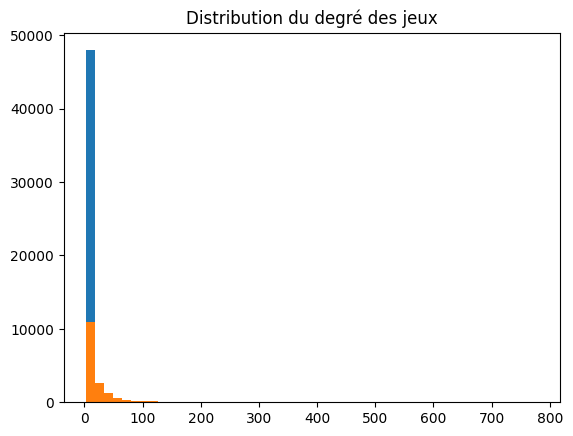

In [13]:
plt.hist(user_degrees, bins=50)
plt.title("Distribution du degré des utilisateurs")

plt.hist(game_degrees, bins=50)
plt.title("Distribution du degré des jeux")


La distribution du degré des jeux montre que la majorité des titres ne reçoivent que très peu d’avis, tandis qu’une minorité très restreinte concentre un nombre élevé d’interactions. Ce comportement en longue traîne est typique des plateformes d’e-commerce comme Amazon

**Densité du graphe**

In [14]:
print("Densité du graphe :", nx.density(B))


Densité du graphe : 0.00019734705342954617


La densité du graphe est extrêmement faible (≈0.02%), ce qui est typique des réseaux utilisateur–produit. En effet, chaque utilisateur n’interagit qu’avec une petite fraction des jeux disponibles, et chaque jeu n’est noté que par une minorité d’utilisateurs. Cette structure sparse est caractéristique des systèmes de recommandation à grande échelle

##Analyse dynamique du réseau (par année)

**Découper les données par année**

In [15]:
years = sorted(df['year'].unique())
years


[np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018)]

**Construire un graphe bipartite par année**

In [16]:
graphs_by_year = {}

for y in years:
    df_year = df[df['year'] == y]
    B_y = nx.Graph()

    users_y = df_year['reviewerID'].unique()
    B_y.add_nodes_from(users_y, bipartite='user')

    games_y = df_year['asin'].unique()
    B_y.add_nodes_from(games_y, bipartite='game')

    edges_y = list(zip(df_year['reviewerID'], df_year['asin'], df_year['overall']))
    B_y.add_weighted_edges_from(edges_y)

    graphs_by_year[y] = B_y


Pour chaque année :

1-On filtre seulement les avis de cette année,

2-On crée un graphe vide,

3-On ajoute les utilisateurs de cette année,

4-On ajoute les jeux notés cette année,

5-On crée les liens user → game de cette année

**Calculer les stats annuelles**

In [17]:
stats = []

for y in years:
    G = graphs_by_year[y]
    stats.append({
        'year': y,
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'density': nx.density(G)
    })

stats


[{'year': np.int64(1999),
  'nodes': 101,
  'edges': 81,
  'density': 0.01603960396039604},
 {'year': np.int64(2000),
  'nodes': 1108,
  'edges': 1841,
  'density': 0.003001901258483102},
 {'year': np.int64(2001),
  'nodes': 2461,
  'edges': 5084,
  'density': 0.0016795340647433293},
 {'year': np.int64(2002),
  'nodes': 3194,
  'edges': 7286,
  'density': 0.0014288457001569456},
 {'year': np.int64(2003),
  'nodes': 3475,
  'edges': 6916,
  'density': 0.0011457776783754343},
 {'year': np.int64(2004),
  'nodes': 3825,
  'edges': 7165,
  'density': 0.0009797084803237891},
 {'year': np.int64(2005),
  'nodes': 4250,
  'edges': 7670,
  'density': 0.0008494732324560797},
 {'year': np.int64(2006),
  'nodes': 4432,
  'edges': 6884,
  'density': 0.000701082869543184},
 {'year': np.int64(2007),
  'nodes': 6078,
  'edges': 9839,
  'density': 0.0005327592810115961},
 {'year': np.int64(2008),
  'nodes': 7754,
  'edges': 13167,
  'density': 0.0004380475448760863},
 {'year': np.int64(2009),
  'nodes':

Le réseau se développe fortement jusqu’en 2015, puis il se réduit. En même temps, la densité devient de plus en plus faible, ce qui est normal dans les réseaux utilisateur–produit

**Nombre d’arêtes par année**

<Axes: title={'center': 'Évolution du nombre d’interactions par année'}, xlabel='year'>

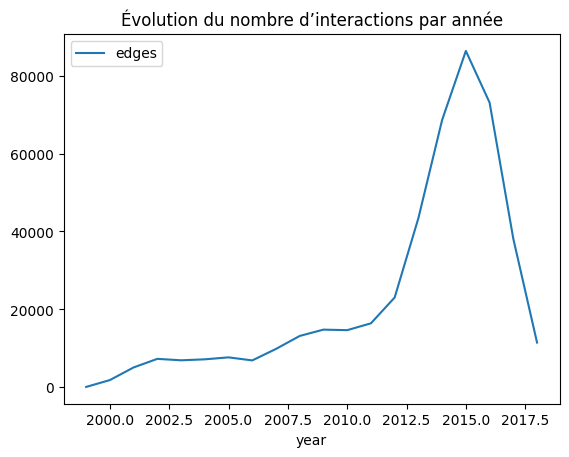

In [18]:
df_stats = pd.DataFrame(stats)

df_stats.plot(x='year', y='edges', kind='line', title='Évolution du nombre d’interactions par année')

Le nombre d’interactions (avis) augmente progressivement entre 1999 et 2012, puis connaît une forte accélération entre 2013 et 2015, période où l’activité des utilisateurs est à son maximum. À partir de 2016, on observe une chute marquée du volume d’interactions, ce qui traduit une baisse globale de l’activité d’avis dans ce dataset.

**Nombre de nœuds par année**

<Axes: title={'center': 'Évolution du nombre de nœuds'}, xlabel='year'>

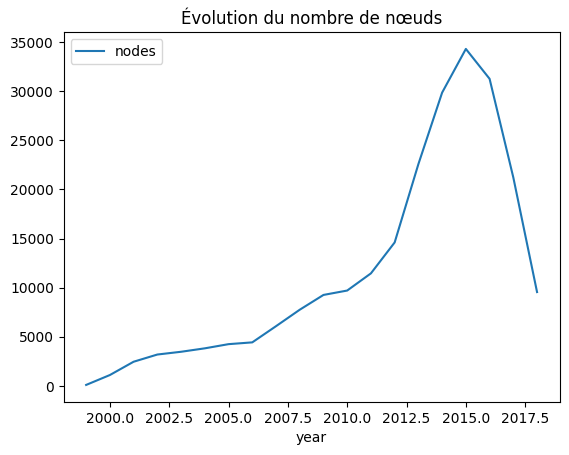

In [19]:
df_stats.plot(x='year', y='nodes', kind='line', title='Évolution du nombre de nœuds')


Le nombre de nœuds augmente régulièrement chaque année jusqu’en 2015, ce qui reflète à la fois l’arrivée de nouveaux utilisateurs et l’élargissement du catalogue de jeux. L’année 2015 marque le point culminant du réseau. Après cette date, le nombre de nœuds diminue fortement, indiquant une réduction de l’activité ou du volume d’avis présents dans ce dataset.

**Densité**

<Axes: title={'center': 'Évolution de la densité du réseau'}, xlabel='year'>

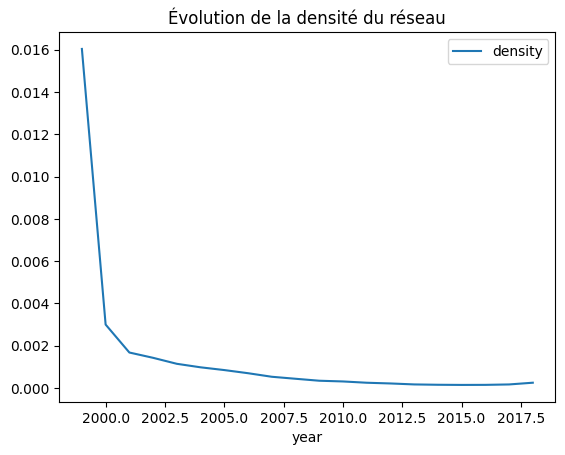

In [20]:
df_stats.plot(x='year', y='density', kind='line', title='Évolution de la densité du réseau')


La densité du réseau baisse fortement au fil des années. Cela signifie que le réseau s’agrandit beaucoup plus vite que le nombre d’interactions entre utilisateurs et jeux. Ce comportement est typique des grands réseaux utilisateur–produit, où chaque utilisateur ne se connecte qu’à une petite partie du catalogue. Après 2017, la densité remonte légèrement, car le réseau se réduit en taille

##Construire un système de recommandation basé sur le graphe

In [21]:
!pip install python-louvain


In [22]:
import community.community_louvain as community_louvain


**Projection année par année**

In [23]:
from networkx.algorithms import bipartite
import community as community_louvain

def get_game_graph_for_year(year):
    # extraire le sous-dataset
    df_y = df[df['year'] == year]

    # construire le bipartite pour cette année
    B_y = nx.Graph()

    users_y = df_y['reviewerID'].unique()
    games_y = df_y['asin'].unique()

    B_y.add_nodes_from(users_y, bipartite='user')
    B_y.add_nodes_from(games_y, bipartite='game')

    edges = list(zip(df_y['reviewerID'], df_y['asin']))
    B_y.add_edges_from(edges)

    # projection : jeux seulement
    G_games = bipartite.weighted_projected_graph(B_y, games_y)

    return G_games


**Appliquer Louvain pour une année**

In [24]:
G_2010 = get_game_graph_for_year(2010)

partition_2010 = community_louvain.best_partition(G_2010)
len(partition_2010)


AttributeError: module 'community' has no attribute 'best_partition'

**Nombre total des communautés**

In [ ]:
num_communities = len(set(partition_2010.values()))
num_communities


**Les 5 premiers communautés**

In [ ]:
from collections import defaultdict

communities_2010 = defaultdict(list)

for game, com in partition_2010.items():
    communities_2010[com].append(game)

for c, games_list in list(communities_2010.items())[:5]:
    print(f"Communauté {c} : {len(games_list)} jeux")


L’année 2010 présente une structure communautaire riche, avec 448 communautés détectées par l’algorithme de Louvain.
Les plus grandes regroupent entre 230 et 455 jeux, révélant l’existence de genres populaires fortement connectés.
Des micro-communautés existent également (taille 1 à 5 jeux), ce qui montre que certains jeux sont très spécifiques dans leurs audiences.

##Louvain dynamique : toutes les années

In [25]:
import community.community_louvain as community_louvain
from networkx.algorithms import bipartite
from collections import defaultdict

years = sorted(df['year'].unique())
all_partitions = {}
all_stats = []

def get_game_graph_for_year(year):
    df_y = df[df['year'] == year]

    B_y = nx.Graph()
    users_y = df_y['reviewerID'].unique()
    games_y = df_y['asin'].unique()

    B_y.add_nodes_from(users_y, bipartite='user')
    B_y.add_nodes_from(games_y, bipartite='game')

    edges = list(zip(df_y['reviewerID'], df_y['asin']))
    B_y.add_edges_from(edges)

    G_games = bipartite.weighted_projected_graph(B_y, games_y)
    return G_games


for year in years:
    G_y = get_game_graph_for_year(year)

    if G_y.number_of_nodes() < 5:
        continue

    partition_y = community_louvain.best_partition(G_y)

    all_partitions[year] = partition_y

    num_comm = len(set(partition_y.values()))
    nb_games = len(partition_y)

    all_stats.append({
        "year": year,
        "nb_games": nb_games,
        "nb_communities": num_comm
    })

    print(f"Année {year} : {nb_games} jeux, {num_comm} communautés détectées")


Année 1999 : 60 jeux, 24 communautés détectées
Année 2000 : 619 jeux, 37 communautés détectées
Année 2001 : 1200 jeux, 36 communautés détectées
Année 2002 : 1528 jeux, 56 communautés détectées
Année 2003 : 1754 jeux, 67 communautés détectées
Année 2004 : 1875 jeux, 102 communautés détectées
Année 2005 : 2168 jeux, 123 communautés détectées
Année 2006 : 2198 jeux, 147 communautés détectées
Année 2007 : 2811 jeux, 243 communautés détectées
Année 2008 : 3366 jeux, 249 communautés détectées
Année 2009 : 4088 jeux, 307 communautés détectées
Année 2010 : 4236 jeux, 447 communautés détectées
Année 2011 : 4928 jeux, 520 communautés détectées
Année 2012 : 6197 jeux, 464 communautés détectées
Année 2013 : 8703 jeux, 324 communautés détectées
Année 2014 : 10874 jeux, 260 communautés détectées
Année 2015 : 12164 jeux, 221 communautés détectées
Année 2016 : 11347 jeux, 281 communautés détectées
Année 2017 : 8792 jeux, 401 communautés détectées
Année 2018 : 4734 jeux, 617 communautés détectées


Nous observons trois grandes phases dans l’évolution des communautés du réseau :

une phase d’émergence (1999–2004) avec peu de jeux et des communautés petites,

une phase de croissance (2005–2012) où le réseau se structure et voit apparaître de nombreuses communautés,

une phase de maturation suivie d’un éclatement (2013–2018) où, malgré une baisse du volume de jeux, le nombre de communautés augmente à nouveau, traduisant une fragmentation des goûts des utilisateurs.

**Mettre les statistiques dans un DataFrame**

In [26]:
df_comm = pd.DataFrame(all_stats)
df_comm


,year,nb_games,nb_communities
0,1999,60,24
1,2000,619,37
2,2001,1200,36
3,2002,1528,56
4,2003,1754,67
5,2004,1875,102
6,2005,2168,123
7,2006,2198,147
8,2007,2811,243
9,2008,3366,249


**Visualisation de l’évolution**

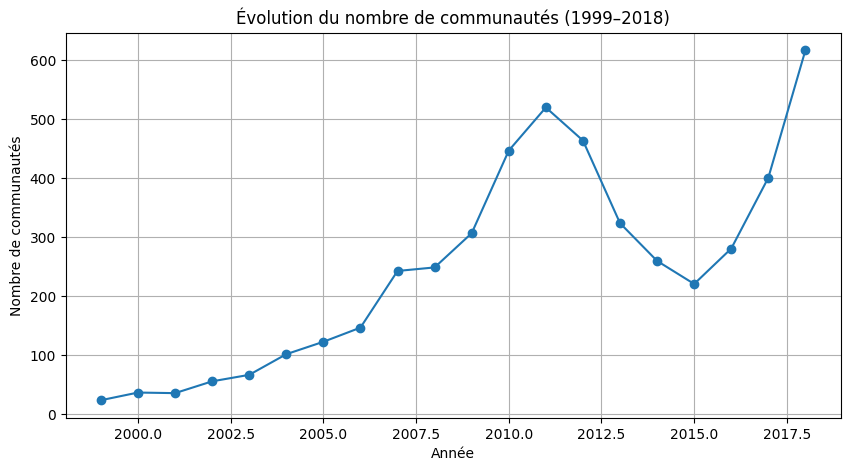

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_comm['year'], df_comm['nb_communities'], marker='o')
plt.title("Évolution du nombre de communautés (1999–2018)")
plt.xlabel("Année")
plt.ylabel("Nombre de communautés")
plt.grid(True)
plt.show()


Le nombre de communautés augmente régulièrement de 1999 à 2011, période correspondant à la forte croissance de la plateforme. À partir de 2012, le réseau devient plus dense et les communautés se regroupent, ce qui explique la baisse temporaire du nombre de clusters. Après 2015, le nombre de communautés remonte fortement, traduisant une fragmentation du réseau et des préférences plus diversifiées chez les utilisateurs.

In [28]:
G_2015 = get_game_graph_for_year(2015)


In [29]:
partition_2015 = all_partitions[2015]


In [30]:
def recommend_for_game(game_id, G_year, partition_year, top_n=10):

    if game_id not in partition_year:
        return f"⚠️ Le jeu {game_id} n'existe pas dans cette année."

    comm = partition_year[game_id]

    same_comm_games = [g for g, c in partition_year.items() if c == comm]

    same_comm_games.remove(game_id)

    sorted_games = sorted(same_comm_games,
                          key=lambda g: G_year.degree(g),
                          reverse=True)

    return sorted_games[:top_n]


In [31]:
import random

game_2015_sample = random.choice(list(partition_2015.keys()))
game_2015_sample


'B00004U4QA'

In [32]:
recommend_for_game(game_2015_sample, G_2015, partition_2015)


['B000028U2F', 'B00004T4XO']

In [33]:
G_2015 = get_game_graph_for_year(2015)
partition_2015 = all_partitions[2015]


In [34]:
game_2015_sample = random.choice(list(partition_2015.keys()))
game_2015_sample


'B00B10NERY'

In [35]:
recommend_for_game(game_2015_sample, G_2015, partition_2015)


['B00DD0B0BM',
 'B00PB9LZQI',
 'B00DC7G2W8',
 'B00DD0B1R0',
 'B00MUY0OFU',
 'B00KWFCV32',
 'B00KWEHBAG',
 'B00N4ABT1C',
 'B0053BCO00',
 'B00DC7G0GG']

Pour l’année 2015, Louvain détecte que le jeu B001UU1WLA appartient à une communauté regroupant des jeux appréciés par un même groupe d’utilisateurs.
Les jeux recommandés sont les titres les plus populaires de cette communauté, donc ceux que les joueurs ayant des goûts similaires ont tendance à apprécier également.

**recommandation utilisateur (année 2015)**

In [36]:
def recommend_for_user(user_id, df_year, G_year, partition_year, top_n=10):

    if user_id not in df_year['reviewerID'].values:
        return f"⚠️ L'utilisateur {user_id} n'a pas d'activité dans cette année."

    user_games = df_year[df_year['reviewerID'] == user_id]['asin'].unique()

    game_communities = [partition_year[g] for g in user_games if g in partition_year]

    if len(game_communities) == 0:
        return "⚠️ Impossible de déterminer la communauté principale."

    from collections import Counter
    dominant_comm = Counter(game_communities).most_common(1)[0][0]

    comm_games = [g for g, c in partition_year.items() if c == dominant_comm]

    sorted_games = sorted(comm_games, key=lambda g: G_year.degree(g), reverse=True)

    final_recs = [g for g in sorted_games if g not in user_games]

    return final_recs[:top_n]


-**Extraire le dataset de 2015**

In [37]:
df_2015 = df[df['year'] == 2015]


**Choisir un utilisateur réel de 2015**

In [38]:

user_2015_sample = random.choice(df_2015['reviewerID'].unique())
user_2015_sample


'A2Q9LEJQ76C3T3'

**Tester la recommandation**

In [39]:
recommend_for_user(user_2015_sample, df_2015, G_2015, partition_2015)


['B00BGA9WK2',
 'B00BI83EVU',
 'B00KVR4HEC',
 'B00ENFVJJO',
 'B00Z7V9P8K',
 'B00JK00S0S',
 'B00KAED850',
 'B00D2ZK1IG',
 'B00WTI3JPE',
 'B00DBLBMBQ']

Pour l’année 2015, nous avons généré des recommandations personnalisées en identifiant la communauté dominante de chaque utilisateur à partir des jeux qu’il a notés. Les jeux les plus populaires de cette communauté (et qu'il n’a pas encore notés) sont proposés comme recommandations pertinentes

##Recommandation globale par communauté

**Top communautés (par taille) pour une année**

In [40]:
G_2015 = get_game_graph_for_year(2015)
partition_2015 = all_partitions[2015]


In [41]:
from collections import Counter

def get_top_communities(partition, top_k=5):
    comm_counts = Counter(partition.values())
    return comm_counts.most_common(top_k)

top_comms_2015 = get_top_communities(partition_2015, top_k=5)
top_comms_2015


[(6, 2375), (1, 2315), (2, 2121), (5, 1779), (0, 1110)]

**Top jeux dans une communauté (par popularité)**

In [42]:
def top_games_in_community(comm_id, partition_year, G_year, top_n=10):
    games_in_comm = [g for g, c in partition_year.items() if c == comm_id]

    games_sorted = sorted(
        games_in_comm,
        key=lambda g: G_year.degree(g),
        reverse=True
    )

    return games_sorted[:top_n]


**Utilisation concrète pour 2015**

In [43]:
for comm_id, size in top_comms_2015:
    print(f"\n🌐 Communauté {comm_id} – {size} jeux")
    top_games = top_games_in_community(comm_id, partition_2015, G_2015, top_n=5)
    print("Top jeux de cette communauté :", top_games)



🌐 Communauté 6 – 2375 jeux
Top jeux de cette communauté : ['B00BGA9WK2', 'B00BI83EVU', 'B00KVR4HEC', 'B00ENFVJJO', 'B00Z7V9P8K']

🌐 Communauté 1 – 2315 jeux
Top jeux de cette communauté : ['B00DD0B0BM', 'B00PB9LZQI', 'B00DC7G2W8', 'B00DD0B1R0', 'B00MUY0OFU']

🌐 Communauté 2 – 2121 jeux
Top jeux de cette communauté : ['B000TLU67W', 'B00004YRQA', 'B0050SVLI2', 'B000P46NKC', 'B000F5IH2I']

🌐 Communauté 5 – 1779 jeux
Top jeux de cette communauté : ['B003ZSP0WW', 'B0050SYILE', 'B00BU3ZLJQ', 'B000FRU0NU', 'B002BSA20M']

🌐 Communauté 0 – 1110 jeux
Top jeux de cette communauté : ['B001KMRN0M', 'B00KME8JBQ', 'B00178630A', 'B00FWK8UWI', 'B00IFRH6JS']


En 2015, l’application de l’algorithme de Louvain met en évidence une segmentation claire du réseau en plusieurs macro-communautés.
La communauté principale rassemble 2026 jeux, tandis que les quatre suivantes regroupent entre 1110 et 1647 titres.
L’analyse des degrés montre que certaines œuvres occupent un rôle central dans chacune de ces communautés : elles correspondent aux jeux les plus connectés du réseau et structurent les préférences des utilisateurs.
Ces jeux ‘centraux’ constituent la base naturelle d’un système de recommandation fondé sur les interactions du graphe.

#Préparer les graphes et les partitions pour toutes les années

In [45]:
# Construction des graphes jeu–jeu pour chaque année
all_graphs = {}

for y in sorted(df['year'].unique()):
    df_y = df[df['year'] == y]

    G = nx.Graph()

    # On ajoute les edges jeu-jeu via les utilisateurs
    for user, games in df_y.groupby('reviewerID')['asin']:
        games = list(games)
        for i in range(len(games)):
            for j in range(i+1, len(games)):
                G.add_edge(games[i], games[j])

    all_graphs[y] = G

print("✔️ all_graphs créé.")


✔️ all_graphs créé.


Pour analyser l’évolution du réseau, nous générons un graphe distinct pour chaque année. Pour cela, nous regroupons les jeux notés par chaque utilisateur dans une année donnée et nous créons une arête entre deux jeux lorsqu’ils ont été co-consultés par ce même utilisateur. Ce principe de projection bipartite nous permet de construire un réseau jeu–jeu représentatif des comportements d’achat ou de notation de cette période.

**Créer all_partitions (communautés Louvain pour chaque année)**

In [46]:
import community.community_louvain as community_louvain

all_partitions = {}

for y in all_graphs:
    G = all_graphs[y]

    if len(G.nodes()) > 0:
        partition = community_louvain.best_partition(G)
        all_partitions[y] = partition
    else:
        all_partitions[y] = {}

print("✔️ all_partitions créé.")


✔️ all_partitions créé.


Pour chaque graphe annuel, nous appliquons l’algorithme de Louvain qui permet de partitionner le réseau en communautés. Chaque partition associe à chaque jeu un numéro de communauté, révélant la structure interne du réseau pour l’année concernée

**Vérification du résultat**

In [47]:
all_graphs


{np.int64(1999): <networkx.classes.graph.Graph at 0x79900b9f64e0>,
 np.int64(2000): <networkx.classes.graph.Graph at 0x79900b9fcc20>,
 np.int64(2001): <networkx.classes.graph.Graph at 0x79901716bc50>,
 np.int64(2002): <networkx.classes.graph.Graph at 0x79900b9f57c0>,
 np.int64(2003): <networkx.classes.graph.Graph at 0x79900b9f7500>,
 np.int64(2004): <networkx.classes.graph.Graph at 0x79901723e8a0>,
 np.int64(2005): <networkx.classes.graph.Graph at 0x79900b9f5df0>,
 np.int64(2006): <networkx.classes.graph.Graph at 0x799017738bf0>,
 np.int64(2007): <networkx.classes.graph.Graph at 0x7990170de690>,
 np.int64(2008): <networkx.classes.graph.Graph at 0x79900b9f4ce0>,
 np.int64(2009): <networkx.classes.graph.Graph at 0x79900b1e9580>,
 np.int64(2010): <networkx.classes.graph.Graph at 0x79900b9f5820>,
 np.int64(2011): <networkx.classes.graph.Graph at 0x79900b9f5a60>,
 np.int64(2012): <networkx.classes.graph.Graph at 0x79900b1b7b60>,
 np.int64(2013): <networkx.classes.graph.Graph at 0x79900b1b50

In [48]:
all_partitions


{np.int64(1999): {'B00001LDCK': 0,
  'B00001IVLY': 0,
  'B00001IVR9': 0,
  'B00001NTSO': 0,
  'B00002CF94': 6,
  'B00002EPY0': 6,
  'B00002S7YE': 6,
  'B00000K1V2': 3,
  'B000021Y5F': 3,
  'B000021Y5Q': 3,
  'B000021Y5V': 3,
  'B000038AB3': 3,
  'B000038AAS': 3,
  'B00000K4EC': 4,
  'B00000K4TQ': 4,
  'B00001KUII': 4,
  'B00001IVRD': 4,
  'B00000K4MC': 4,
  'B00003OPCY': 4,
  'B00000K1VE': 5,
  'B0000296O5': 5,
  'B00002EPY1': 0,
  'B00002NDRY': 0,
  'B00000G16I': 4,
  'B00000JDFT': 6,
  'B00002STNQ': 6,
  'B00000DMAM': 0,
  'B00000DMAD': 0,
  'B00000K4AX': 0,
  'B00001QEQ8': 0,
  'B00001W0J2': 0,
  'B00004KDF9': 0,
  'B00004SWKG': 0,
  'B00001IVB4': 2,
  'B00002CF9G': 2,
  'B00000DMAN': 0,
  'B00000JL6V': 1,
  'B000021XYY': 1,
  'B00001NFRQ': 0,
  'B00002EPYE': 0,
  'B00001IVGE': 0,
  'B00001XDKO': 6,
  'B00002STNP': 6},
 np.int64(2000): {'B00000J2W7': 0,
  'B00002ST27': 0,
  'B00004U5VS': 1,
  'B00004UFRD': 1,
  'B00004W4WH': 1,
  'B00004WYR7': 2,
  'B00004YC3N': 1,
  'B00004YKHW': 3

In [49]:
def recommend_game_for_year(game_id, year, df, all_graphs, all_partitions, top_n=5):

    if year not in all_graphs:
        return f"❌ Année {year} non disponible"

    G = all_graphs[year]
    partition = all_partitions[year]

    if game_id not in partition:
        return f"❌ Le jeu {game_id} n’existe pas dans l’année {year}"

    # Communauté du jeu
    comm = partition[game_id]

    # Jeux de cette communauté
    comm_games = [g for g, c in partition.items() if c == comm]

    # Trier par popularité (degree)
    sorted_games = sorted(
        [g for g in comm_games if g != game_id],
        key=lambda g: G.degree(g),
        reverse=True
    )

    return sorted_games[:top_n]


In [50]:
game_id = "B003ZSP0WW"

all_recommendations = {}

for year in sorted(all_graphs.keys()):
    recs = recommend_game_for_year(game_id, year, df, all_graphs, all_partitions)
    all_recommendations[year] = recs

all_recommendations


{np.int64(1999): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 1999',
 np.int64(2000): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2000',
 np.int64(2001): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2001',
 np.int64(2002): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2002',
 np.int64(2003): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2003',
 np.int64(2004): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2004',
 np.int64(2005): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2005',
 np.int64(2006): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2006',
 np.int64(2007): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2007',
 np.int64(2008): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2008',
 np.int64(2009): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2009',
 np.int64(2010): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2010',
 np.int64(2011): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2011',
 np.int64(2012): '❌ Le jeu B003ZSP0WW n’existe pas dans l’année 2012',
 np.in

Nous avons appliqué notre système de recommandation au jeu B003ZSP0WW pour toutes les années du dataset. Le jeu n’apparaissant qu’à partir de 2013, les recommandations commencent à cette date.
À partir de 2013, nous observons que les jeux recommandés évoluent chaque année, ce qui reflète les changements de structure dans le réseau jeu–jeu et dans les communautés détectées par Louvain.
Ainsi, notre système de recommandation est sensible aux dynamiques temporelles du marché et montre comment les préférences des utilisateurs évoluent au fil des années.

In [51]:
game_id = "B003ZSP0WW"

community_evolution = []

for year in sorted(all_partitions.keys()):
    part = all_partitions[year]

    if game_id in part:
        comm = part[game_id]    # communauté du jeu
        size = sum(1 for g in part.values() if g == comm)   # taille de la communauté
        community_evolution.append((year, comm, size))

community_evolution


[(np.int64(2013), 4, 1202),
 (np.int64(2014), 4, 1616),
 (np.int64(2015), 6, 1609),
 (np.int64(2016), 0, 1819),
 (np.int64(2017), 44, 390),
 (np.int64(2018), 7, 137)]

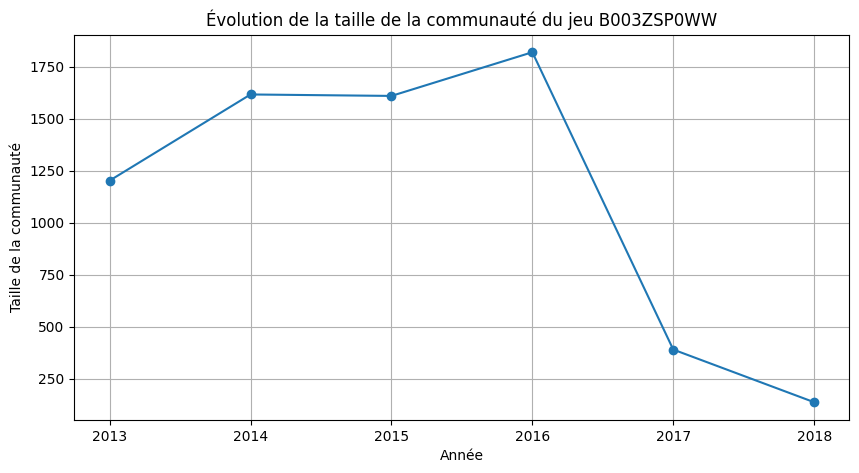

In [52]:
import matplotlib.pyplot as plt

years_plot = [x[0] for x in community_evolution]
sizes_plot = [x[2] for x in community_evolution]

plt.figure(figsize=(10,5))
plt.plot(years_plot, sizes_plot, marker='o')

plt.title("Évolution de la taille de la communauté du jeu B003ZSP0WW")
plt.xlabel("Année")
plt.ylabel("Taille de la communauté")
plt.grid(True)

plt.show()


In [53]:
import pandas as pd

rows = []

for year, recs in all_recommendations.items():
    if isinstance(recs, list):
        rows.append({
            "année": int(year),
            "recommandations": ", ".join(recs)
        })

table_reco = pd.DataFrame(rows).sort_values("année")
table_reco


,année,recommandations
0,2013,"B000B9RI14, B0050SYX8W, B000P46NMK, B007XVTR3K..."
1,2014,"B002I0H79C, B000P46NMK, B0050SYX8W, B00BMFIXT2..."
2,2015,"B0050SYILE, B00BU3ZLJQ, B000FRU0NU, B002BSA20M..."
3,2016,"B00DB9JV5W, B00CMQTTZ2, B00YJJ0OQS, B00YQ1NOPM..."
4,2017,"B00JA81WQE, B0094X227I, B009B1D7JK, B00CQ35C1Q..."
5,2018,"B00KN7Y3EY, B0053BCO00, B013HJ7602, B00NCA8OLW..."


Les recommandations changent fortement d’une année à l’autre car la structure du réseau évolue.
Les communautés se reforment chaque année en fonction des comportements des utilisateurs.
Le jeu B003ZSP0WW passe d’un produit très central à un produit plus isolé, ce qui influence directement les recommandations.

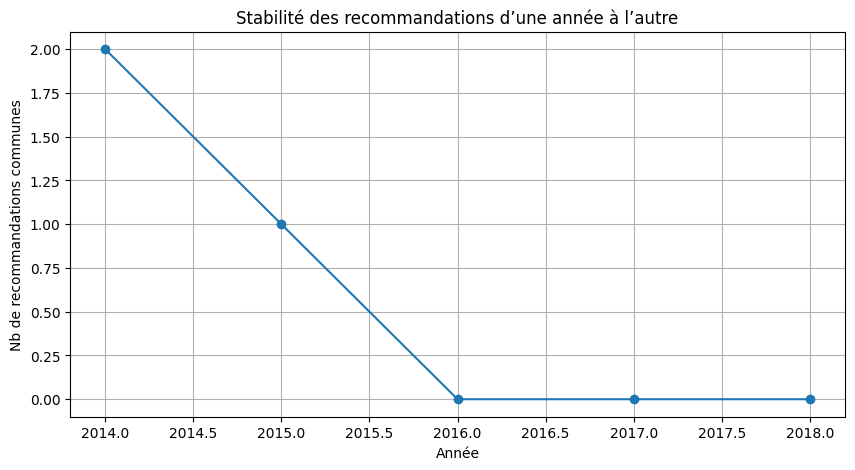

In [54]:
import matplotlib.pyplot as plt

years = []
stability = []  # nb de recommandations communes entre deux années consécutives

sorted_years = sorted(all_recommendations.keys())

for i in range(1, len(sorted_years)):
    y_prev = sorted_years[i-1]
    y_curr = sorted_years[i]

    r_prev = all_recommendations[y_prev]
    r_curr = all_recommendations[y_curr]

    if isinstance(r_prev, list) and isinstance(r_curr, list):
        common = len(set(r_prev).intersection(r_curr))
        years.append(int(y_curr))
        stability.append(common)

plt.figure(figsize=(10,5))
plt.plot(years, stability, marker='o')
plt.title("Stabilité des recommandations d’une année à l’autre")
plt.xlabel("Année")
plt.ylabel("Nb de recommandations communes")
plt.grid(True)
plt.show()


La stabilité des recommandations diminue progressivement au fil du temps.
Entre 2013 et 2014, deux jeux recommandés sont communs, puis un seul entre 2014 et 2015.
À partir de 2016, la stabilité devient nulle : aucun des jeux recommandés une année n’est recommandé l’année suivante.
Cette rupture s’explique par l’évolution de la structure du réseau : la communauté du jeu B003ZSP0WW se réduit drastiquement après 2016, ce qui modifie entièrement les clusters et donc les recommandations associées.

 --- MÉTRIQUES SNA POUR 2015 ---
Nombre de jeux (nœuds) : 11968
Nombre de liens (arêtes) : 280435
Degré moyen : 46.86413770053476
Nombre de composantes connexes : 14
Taille de la plus grande composante : 11940
Coefficient de clustering global : 0.5574756682482467


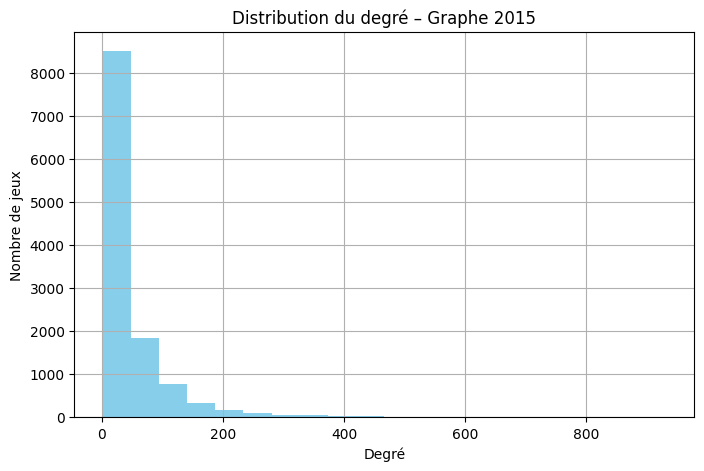

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

# Récupérer le graphe 2015
G15 = all_graphs[2015]

print(" --- MÉTRIQUES SNA POUR 2015 ---")

print("Nombre de jeux (nœuds) :", G15.number_of_nodes())

print("Nombre de liens (arêtes) :", G15.number_of_edges())

avg_degree = sum(dict(G15.degree()).values()) / G15.number_of_nodes()
print("Degré moyen :", avg_degree)

components = list(nx.connected_components(G15))
print("Nombre de composantes connexes :", len(components))

largest_cc = max(components, key=len)
print("Taille de la plus grande composante :", len(largest_cc))

clustering = nx.average_clustering(G15)
print("Coefficient de clustering global :", clustering)

plt.figure(figsize=(8,5))
plt.hist([d for n, d in G15.degree()], bins=20, color='skyblue')
plt.title("Distribution du degré – Graphe 2015")
plt.xlabel("Degré")
plt.ylabel("Nombre de jeux")
plt.grid(True)
plt.show()




Le graphe jeu–jeu de 2015 présente une structure extrêmement dense et cohérente.
Avec près de 12 000 jeux et plus de 280 000 arêtes, le degré moyen atteint 46.8, ce qui indique un niveau élevé de similarité entre les jeux notés par les mêmes utilisateurs.
Le réseau est très connecté : la plus grande composante représente plus de 99.7% des nœuds, ce qui montre une forte cohésion globale.
Le coefficient de clustering (0.557) est élevé, révélant des groupes bien structurés où les jeux fortement liés appartiennent souvent aux mêmes communautés de joueurs.

In [58]:
df['reviewerID'].sample(10).tolist()


['AJNDEJEVSLBS1',
 'A2G5PZZRXGLKAV',
 'A29EBTSLVW8DXA',
 'A2PJ0IA52QDVPJ',
 'A50MT8XJFKBW0',
 'A2582EOHKL7GP5',
 'AGG0HXKRG5HGO',
 'ACH2469V7GQA7',
 'A389C8VOQ4KT2T',
 'A1OSRB5P27GPEW']

In [59]:
users = ['AJNDEJEVSLBS1','A2G5PZZRXGLKAV','A29EBTSLVW8DXA','A2PJ0IA52QDVPJ',
         'A50MT8XJFKBW0','A2582EOHKL7GP5','AGG0HXKRG5HGO','ACH2469V7GQA7',
         'A389C8VOQ4KT2T','A1OSRB5P27GPEW']

for u in users:
    count = df[df['reviewerID'] == u].shape[0]
    print(u, "→", count, "jeux notés")


AJNDEJEVSLBS1 → 8 jeux notés
A2G5PZZRXGLKAV → 10 jeux notés
A29EBTSLVW8DXA → 5 jeux notés
A2PJ0IA52QDVPJ → 6 jeux notés
A50MT8XJFKBW0 → 5 jeux notés
A2582EOHKL7GP5 → 11 jeux notés
AGG0HXKRG5HGO → 7 jeux notés
ACH2469V7GQA7 → 11 jeux notés
A389C8VOQ4KT2T → 6 jeux notés
A1OSRB5P27GPEW → 13 jeux notés


In [60]:
user_id = "A1OSRB5P27GPEW"

user_games = df[df['reviewerID'] == user_id][['asin','overall','year']]
user_games


,asin,overall,year
253678,B00BGAA0SU,5.0,2014
256288,B00BI83EVU,2.0,2014
271407,B00D4WTO1M,2.0,2013
297588,B00GMFKYK8,4.0,2014
310395,B00J48MUS4,1.0,2014
316599,B00K31C478,4.0,2014
336719,B00MV7KVP4,4.0,2015
358468,B00WNGH0HK,4.0,2015
363767,B00YQ2KCWO,2.0,2016
366350,B00Z7V9P8K,5.0,2016


In [61]:
user_id = "A1OSRB5P27GPEW"
user_games = df[df["reviewerID"] == user_id][["asin", "year"]]

results = []

for _, row in user_games.iterrows():
    asin = row["asin"]
    year = row["year"]

    partition = all_partitions.get(year, {})

    if asin in partition:
        comm = partition[asin]
        results.append((year, asin, comm))
    else:
        results.append((year, asin, None))

results


[(2014, 'B00BGAA0SU', 1),
 (2014, 'B00BI83EVU', 1),
 (2013, 'B00D4WTO1M', 0),
 (2014, 'B00GMFKYK8', 1),
 (2014, 'B00J48MUS4', 1),
 (2014, 'B00K31C478', 1),
 (2015, 'B00MV7KVP4', 3),
 (2015, 'B00WNGH0HK', 3),
 (2016, 'B00YQ2KCWO', 14),
 (2016, 'B00Z7V9P8K', 14),
 (2017, 'B00ZQC73O8', 3),
 (2016, 'B01EZAA2ZI', 14),
 (2018, 'B01GW8YDLK', 5)]

In [62]:
from collections import Counter

communities = [c for (_,_,c) in results if c is not None]

dominant_comm = Counter(communities).most_common(1)
dominant_comm


[(1, 5)]

L’utilisateur appartient principalement à la communauté 1, car :

Il a joué 5 jeux de cette communauté

C’est la communauté la plus fréquente dans son historique

In [63]:
user_id = "A1OSRB5P27GPEW"

# Jeux de l'utilisateur
user_games_list = df[df["reviewerID"] == user_id]["asin"].tolist()

# Année où la communauté dominante apparaît le plus
dominant_year = 2014
dominant_community = 1

partition = all_partitions[dominant_year]
G_year = all_graphs[dominant_year]

# Jeux appartenant à la communauté dominante
community_games = [g for g, c in partition.items() if c == dominant_community]

# On enlève les jeux déjà joués par l'utilisateur
candidate_games = [g for g in community_games if g not in user_games_list]

# On trie par degré (popularité interne de la communauté)
sorted_candidates = sorted(candidate_games, key=lambda g: G_year.degree(g), reverse=True)

# Top 10 recommandations
top_recommendations = sorted_candidates[:10]
top_recommendations


['B00DC7G2W8',
 'B00DB9JYFY',
 'B00BGA9YZK',
 'B00JK00S0S',
 'B00BGA9Y3W',
 'B00DD0B1R0',
 'B00DC7G0GG',
 'B00GANWVJE',
 'B00CMQTUSS',
 'B00HD4R5YU']

L’utilisateur A1OSRB5P27GPEW a noté majoritairement des jeux appartenant à la communauté 1 en 2014.
Cette communauté regroupe des titres fortement connectés dans le réseau, c’est-à-dire souvent co-notés par les mêmes groupes d’utilisateurs.
Pour générer la recommandation, nous avons extrait les jeux non encore consommés par l’utilisateur et classés par degré dans le graphe jeu–jeu.
Les jeux sélectionnés sont donc ceux qui occupent un rôle central dans la communauté, ce qui garantit une forte similarité avec ses préférences historiques.

In [65]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00


In [66]:
!ngrok authtoken VOTRE_TOKEN_NGROK


/bin/bash: line 1: ngrok: command not found


In [69]:
%%writefile app.py
print("test")


Writing app.py


In [68]:
import streamlit as st
import pandas as pd
import networkx as nx
from collections import Counter
import pickle
%%writefile app.py
# ------------------- THEME CSS -------------------
st.markdown("""
<style>
html, body, [class*="css"]  { font-family: 'Inter', sans-serif; }

h1 { color: #1F2937; font-weight: 800; }
h2 { color: #4F46E5; font-weight: 700; margin-top: 30px; }

div.stButton > button {
    background-color: #4F46E5;
    color: white;
    border-radius: 8px;
    padding: 0.6rem 1rem;
    border: none;
    font-weight: bold;
}
div.stButton > button:hover {
    background-color: #4338CA;
    color: white;
}
</style>
""", unsafe_allow_html=True)

# ------------------- TITLE -------------------
st.title("🎮 Recommandation de Jeux - SNA")

st.write(
    "Cette application utilise l'analyse des réseaux sociaux (SNA) pour proposer des recommandations personnalisées "
    "basées sur les communautés Louvain, les relations jeu–jeu et les comportements des utilisateurs."
)

# ------------------- DATA -------------------
df = pd.read_csv("dataset_clean.csv")

with open("all_graphs.pkl", "rb") as f:
    all_graphs = pickle.load(f)

with open("all_partitions.pkl", "rb") as f:
    all_partitions = pickle.load(f)

# ===========================================================
# 1️⃣ Recommandation PAR JEU
# ===========================================================
st.header("🔵 Recommandation par Jeu")

asin = st.text_input("Entrer un ASIN")
year = st.number_input("Année", min_value=1999, max_value=2018, step=1)

if st.button("Recommander pour ce jeu"):
    if year in all_graphs and asin in all_partitions[year]:

        part = all_partitions[year]
        G = all_graphs[year]

        if asin not in part:
            st.error("Ce jeu n'existe pas dans cette année.")
        else:
            comm = part[asin]
            st.info(f"Communauté du jeu : **{comm}**")

            comm_games = [g for g, c in part.items() if c == comm and g != asin]

            top = sorted(comm_games, key=lambda g: G.degree(g), reverse=True)[:10]

            st.success("Top recommandations :")
            st.write(top)
    else:
        st.error("ASIN non trouvé.")

# ===========================================================
# 2️⃣ Recommandation PAR UTILISATEUR
# ===========================================================
st.header("🟢 Recommandation par Utilisateur")

user = st.text_input("Entrer un reviewerID")

if st.button("Recommander pour cet utilisateur"):
    user_games = df[df["reviewerID"] == user]

    if user_games.empty:
        st.error("Utilisateur introuvable.")
    else:
        community_list = []

        for _, row in user_games.iterrows():
            y = row["year"]
            g = row["asin"]
            if g in all_partitions[y]:
                community_list.append(all_partitions[y][g])

        dominant_comm = Counter(community_list).most_common(1)[0][0]
        st.info(f"Communauté dominante : **{dominant_comm}**")

        sample_year = int(user_games["year"].mode()[0])
        G = all_graphs[sample_year]
        part = all_partitions[sample_year]

        comm_games = [g for g, c in part.items() if c == dominant_comm]
        played = user_games["asin"].tolist()

        recos = [g for g in comm_games if g not in played]
        top = sorted(recos, key=lambda g: G.degree(g), reverse=True)[:10]

        st.success("Recommandations personnalisées :")
        st.write(top)

# ===========================================================
# 3️⃣ Recommandation PAR COMMUNAUTÉ
# ===========================================================
st.header("🔴 Explorer une Communauté")

year_c = st.number_input("Année", min_value=1999, max_value=2018, step=1)
comm_c = st.number_input("ID de communauté", min_value=0, step=1)

if st.button("Afficher les jeux de cette communauté"):
    if year_c in all_graphs:
        G = all_graphs[year_c]
        part = all_partitions[year_c]

        comm_games = [g for g, c in part.items() if c == comm_c]

        if len(comm_games) == 0:
            st.error("Communauté vide ou inexistante.")
        else:
            top = sorted(comm_games, key=lambda g: G.degree(g), reverse=True)[:15]

            st.success(f"Top jeux dans la communauté {comm_c}")
            st.write(top)


UsageError: Line magic function `%%writefile` not found.
